In [3]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display,HTML
import pandas as pd
import math

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


import convert2bifxml
importlib.reload(convert2bifxml)

<module 'convert2bifxml' from 'C:\\Users\\kottev\\Documents\\PythonScripts\\jupyler\\contribution4\\convert2bifxml.py'>

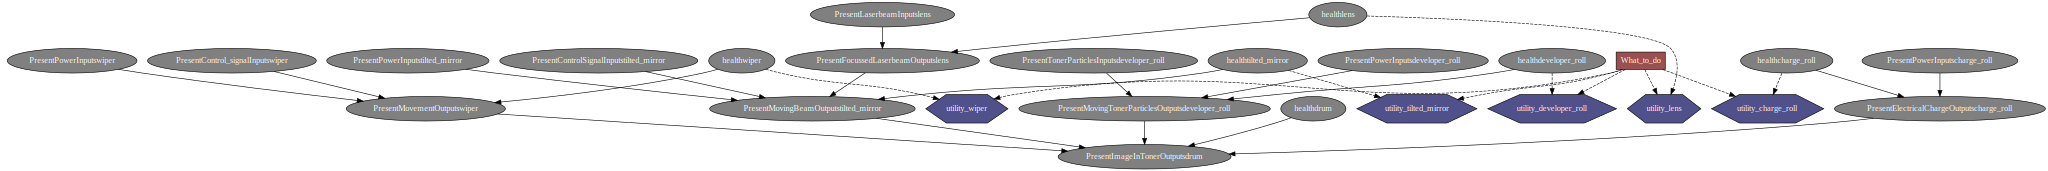

In [4]:
#convert2bifxml.test_function()

diagram = gum.InfluenceDiagram()
convert2bifxml.create_influence_diagram(diagram)

display(HTML("<style>.container { width:100% !important; }</style>"))
gnb.showInfluenceDiagram(diagram, size=35)

In [5]:

variable_names = []
diagramNames = diagram.names()
for dname in diagramNames:
    if (dname.startswith("health")):
        print(dname)        
        variable_names.append(dname)

row_elements = [diagram.cpt(variable_name) for variable_name in variable_names]
gnb.flow.row(*row_elements)
            

healthlens
healthwiper
healthdrum
healthcharge_roll
healthtilted_mirror
healthdeveloper_roll


In [6]:

variable_names = []
diagramNames = diagram.names()
for dname in diagramNames:
    if ("Inputs" in dname):
        print(dname)        
        variable_names.append(dname)
            
row_elements = [diagram.cpt(variable_name) for variable_name in variable_names]
gnb.flow.row(*row_elements)


PresentTonerParticlesInputsdeveloper_roll
PresentControl_signalInputswiper
PresentPowerInputswiper
PresentPowerInputstilted_mirror
PresentControlSignalInputstilted_mirror
PresentPowerInputsdeveloper_roll
PresentLaserbeamInputslens
PresentPowerInputscharge_roll


In [7]:
variable_names = []
diagramNames = diagram.names()
for dname in diagramNames:
    if ("Outputs" in dname):
        print(dname)        
        variable_names.append(dname)
            
row_elements = [diagram.cpt(variable_name) for variable_name in variable_names]
gnb.flow.row(*row_elements)

PresentMovementOutputswiper
PresentElectricalChargeOutputscharge_roll
PresentFocussedLaserbeamOutputslens
PresentMovingBeamOutputstilted_mirror
PresentMovingTonerParticlesOutputsdeveloper_roll
PresentImageInTonerOutputsdrum


In [8]:
gnb.flow.row(diagram.utility("utility_wiper"),diagram.utility("utility_tilted_mirror"),diagram.utility("utility_developer_roll"),diagram.utility("utility_lens"),diagram.utility("utility_charge_roll"))

In [9]:
diagram.saveBIFXML("structure-problem3.bifxml")

In [10]:
inference = gum.ShaferShenoyLIMIDInference(diagram)
inference.setEvidence({"PresentImageInTonerOutputsdrum" : "no"})
inference.makeInference()

print(inference.MEU()["mean"])

print(inference.posteriorUtility("What_to_do"))

137.67650749882637

  What_to_do                                     |
clean_dru|is_tilted|manually_|different|replace_c|
---------|---------|---------|---------|---------|
 68.8651 | 137.6765| 27.4326 | 17.2163 | 17.2189 |



In [11]:
# Wijzig prio probability van 2% kans op broken naar 0.1%
diagram.cpt('healthtilted_mirror').fillWith([0.999,0.001])
diagram.cpt('healthwiper').fillWith([0.999,0.001])
diagram.cpt('healthdeveloper_roll').fillWith([0.999,0.001])

(pyAgrum.Potential<double>@00000169B7746E80) 
  healthdeveloper_r|
ok       |broken   |
---------|---------|
 0.9990  | 0.0010  |

In [12]:
inference = gum.ShaferShenoyLIMIDInference(diagram)
inference.setEvidence({"PresentImageInTonerOutputsdrum" : "yes"})
inference.makeInference()
print(inference.posteriorUtility("What_to_do"))


  What_to_do                                     |
clean_dru|is_tilted|manually_|different|replace_c|
---------|---------|---------|---------|---------|
 0.0236  | 0.0483  | 0.1424  | 0.0059  | 0.1180  |

